In [207]:
import pandas as pd
import os

# Specify the folder path where CSV files are stored
folder_path = r'E:\Masters\Fall 2023\Introduction to Big Data\Airline Delay and Cancellation Data, 2009 - 2018'
file_prefix = '20'  # Assuming files are named '2009.csv', '2010.csv', etc.

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each year's file and read the first 100,000 rows
for year in range(2009, 2019):
    file_name = f'{year}.csv'
    file_path = os.path.join(folder_path, file_name)

    # Read the first 100,000 rows from each file
    data_chunk = pd.read_csv(file_path, nrows=20000)

    # Append the data chunk to the combined DataFrame
    combined_data = combined_data.append(data_chunk, ignore_index=True)

# Display the first few rows of the combined dataset
combined_data.tail()

C:\Users\robin\AppData\Local\Temp\ipykernel_3420\939996062.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_chunk, ignore_index=True)
C:\Users\robin\AppData\Local\Temp\ipykernel_3420\939996062.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_chunk, ignore_index=True)
C:\Users\robin\AppData\Local\Temp\ipykernel_3420\939996062.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data_chunk, ignore_index=True)
C:\Users\robin\AppData\Local\Temp\ipykernel_3420\939996062.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
199995,2018-01-02,EV,4456,CRP,IAH,550.0,540.0,-10.0,11.0,551.0,...,65.0,56.0,35.0,201.0,NaN,NaN,NaN,NaN,NaN,NaN
199996,2018-01-02,EV,4456,IAH,AMA,940.0,934.0,-6.0,15.0,949.0,...,111.0,104.0,86.0,517.0,NaN,NaN,NaN,NaN,NaN,NaN
199997,2018-01-02,EV,4457,DSM,EWR,619.0,646.0,27.0,24.0,710.0,...,161.0,168.0,134.0,1017.0,0.0,27.0,7.0,0.0,0.0,NaN
199998,2018-01-02,EV,4459,BTV,EWR,1744.0,1758.0,14.0,21.0,1819.0,...,93.0,76.0,47.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN
199999,2018-01-02,EV,5250,ATL,HSV,1217.0,1315.0,58.0,19.0,1334.0,...,63.0,54.0,32.0,151.0,49.0,0.0,0.0,0.0,0.0,NaN


In [208]:
#'Unnamed' is the column name to be dropped
column_to_drop = 'Unnamed: 27'

# Drop the specified column from the DataFrame
combined_data = combined_data.drop(column_to_drop, axis=1, errors='ignore')

# Display the first few rows of the modified DataFrame
combined_data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2009-01-01,XE,1204,DCA,EWR,1100.0,1058.0,-2.0,18.0,1116.0,...,0.0,62.0,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-01,XE,1206,EWR,IAD,1510.0,1509.0,-1.0,28.0,1537.0,...,0.0,82.0,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-01,XE,1207,EWR,DCA,1100.0,1059.0,-1.0,20.0,1119.0,...,0.0,70.0,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01,XE,1208,DCA,EWR,1240.0,1249.0,9.0,10.0,1259.0,...,0.0,77.0,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-01,XE,1209,IAD,EWR,1715.0,1705.0,-10.0,24.0,1729.0,...,0.0,105.0,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN


In [209]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              200000 non-null  object 
 1   OP_CARRIER           200000 non-null  object 
 2   OP_CARRIER_FL_NUM    200000 non-null  int64  
 3   ORIGIN               200000 non-null  object 
 4   DEST                 200000 non-null  object 
 5   CRS_DEP_TIME         200000 non-null  float64
 6   DEP_TIME             196774 non-null  float64
 7   DEP_DELAY            196729 non-null  float64
 8   TAXI_OUT             196694 non-null  float64
 9   WHEELS_OFF           196694 non-null  float64
 10  WHEELS_ON            196521 non-null  float64
 11  TAXI_IN              196521 non-null  float64
 12  CRS_ARR_TIME         200000 non-null  float64
 13  ARR_TIME             196521 non-null  float64
 14  ARR_DELAY            196190 non-null  float64
 15  CANCELLED        

In [210]:
combined_data.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,200000.000000,200000.000000,196774.000000,196729.000000,196694.000000,196694.000000,196521.000000,196521.000000,200000.000000,196521.000000,...,200000.000000,200000.000000,196207.000000,196207.000000,200000.000000,45870.000000,45870.000000,45870.000000,45870.000000,45870.000000
mean,2117.995775,1355.660820,1364.484109,12.528092,16.290634,1385.322709,1502.217885,7.488564,1524.502550,1506.791137,...,0.002240,148.081030,143.789411,120.019851,863.657845,20.991476,2.346000,10.809396,0.114781,22.965032
std,1814.343848,470.302101,483.298084,40.884461,9.221641,485.243995,512.919455,6.046074,495.156579,517.920198,...,0.047276,77.342011,77.040747,74.855715,619.977074,53.201632,17.041733,20.598310,2.511942,42.686635
min,1.000000,1.000000,1.000000,-46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,15.000000,15.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.000000,950.000000,955.000000,-4.000000,11.000000,1010.000000,1131.000000,4.000000,1145.000000,1135.000000,...,0.000000,90.000000,86.000000,63.000000,399.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1569.000000,1344.000000,1351.000000,0.000000,14.000000,1404.000000,1534.000000,6.000000,1542.000000,1538.000000,...,0.000000,130.000000,127.000000,103.000000,719.000000,6.000000,0.000000,1.000000,0.000000,4.000000
75%,3044.000000,1735.000000,1745.000000,13.000000,19.000000,1758.000000,1920.000000,9.000000,1925.000000,1925.000000,...,0.000000,182.000000,179.000000,153.000000,1107.000000,21.000000,0.000000,16.000000,0.000000,29.000000
max,8880.000000,2359.000000,2400.000000,1447.000000,176.000000,2400.000000,2400.000000,175.000000,2359.000000,2400.000000,...,1.000000,718.000000,711.000000,683.000000,4983.000000,1447.000000,973.000000,1025.000000,264.000000,1181.000000


In [211]:
combined_data.isnull().sum()

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME                 3226
DEP_DELAY                3271
TAXI_OUT                 3306
WHEELS_OFF               3306
WHEELS_ON                3479
TAXI_IN                  3479
CRS_ARR_TIME                0
ARR_TIME                 3479
ARR_DELAY                3810
CANCELLED                   0
CANCELLATION_CODE      196655
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME      3793
AIR_TIME                 3793
DISTANCE                    0
CARRIER_DELAY          154130
WEATHER_DELAY          154130
NAS_DELAY              154130
SECURITY_DELAY         154130
LATE_AIRCRAFT_DELAY    154130
dtype: int64

In [212]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['OP_CARRIER', 'ORIGIN', 'DEST']  # Add other categorical columns as needed
for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col].astype(str))


C:\Users\robin\AppData\Local\Temp\ipykernel_3420\2461647293.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = arr_delay_first.corr()


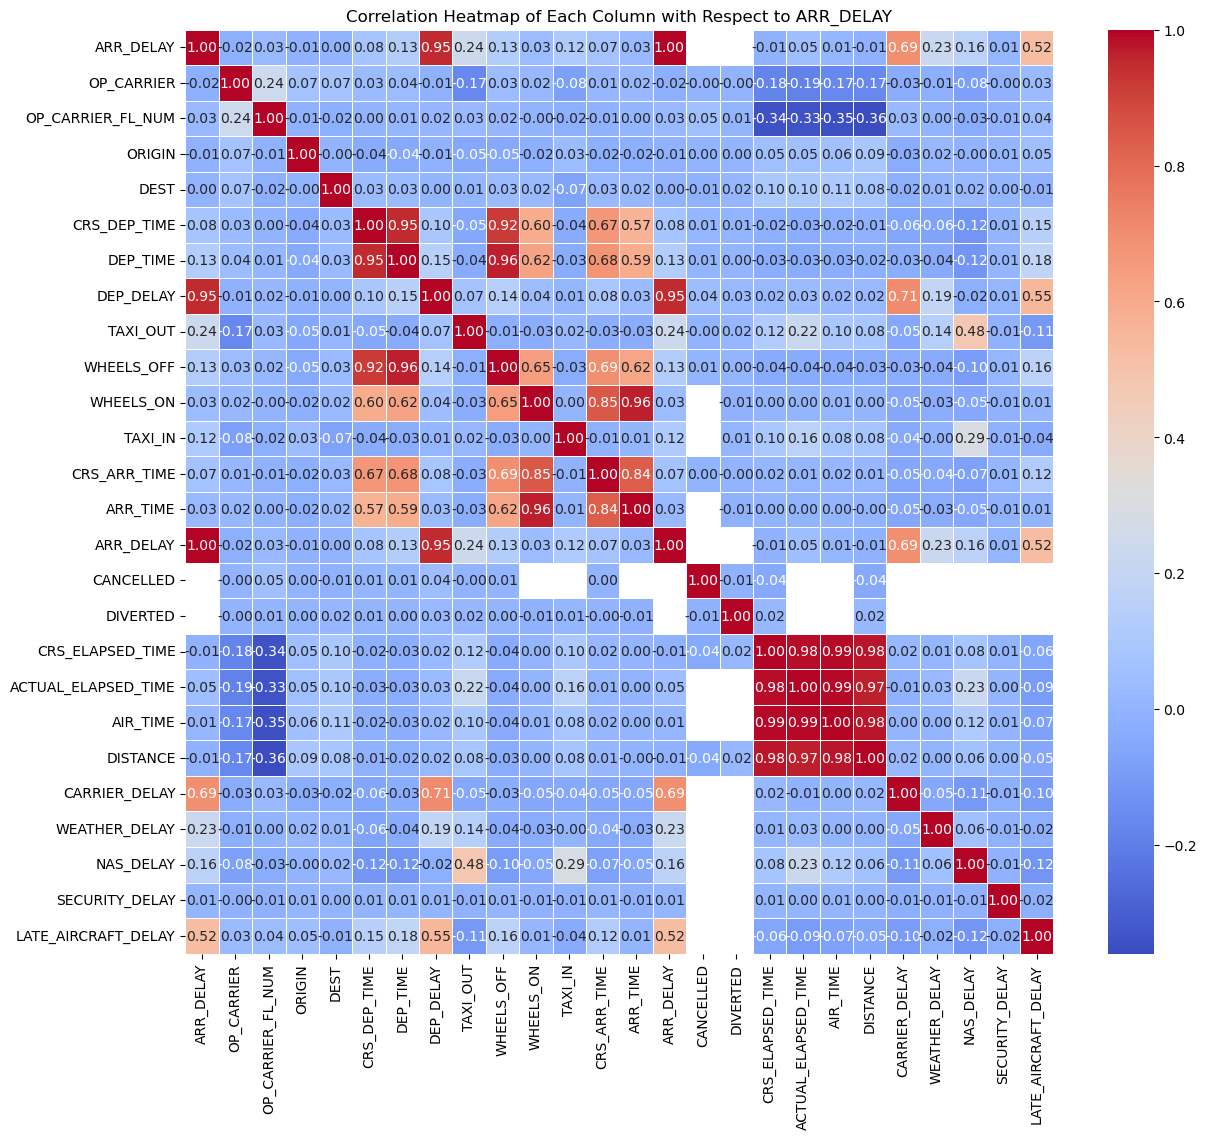

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix with 'ArrDelay' as the first column
arr_delay_first = combined_data[['ARR_DELAY'] + [col for col in combined_data.columns if col != 'ArrDelay']]

# Compute the correlation matrix
correlation_matrix = arr_delay_first.corr()

# Plot a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Each Column with Respect to ARR_DELAY')
plt.show()

Cross-Validated MAE: 23.6098
Cross-Validated MSE: 1884.1282
Cross-Validated R-squared: 0.0021

Test Set MAE: 23.3982
Test Set MSE: 1806.4827
Test Set R-squared: 0.0049



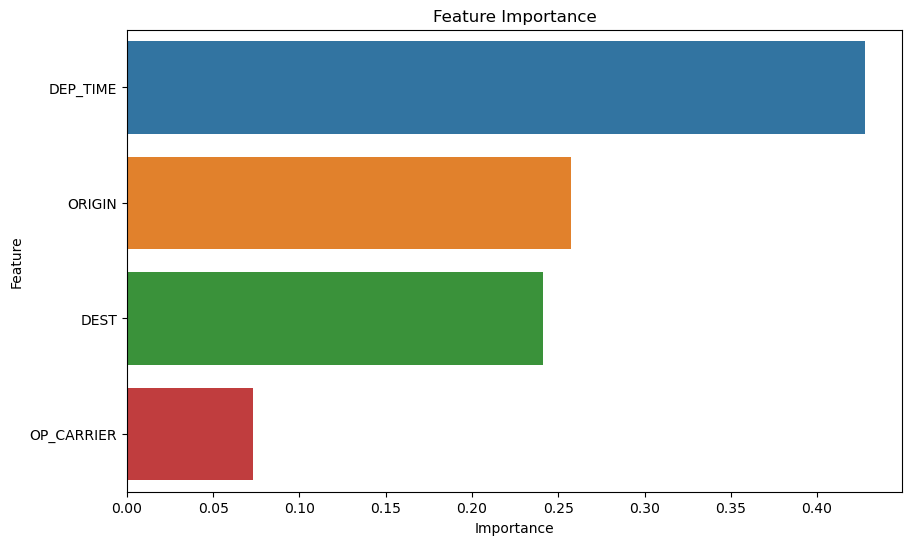

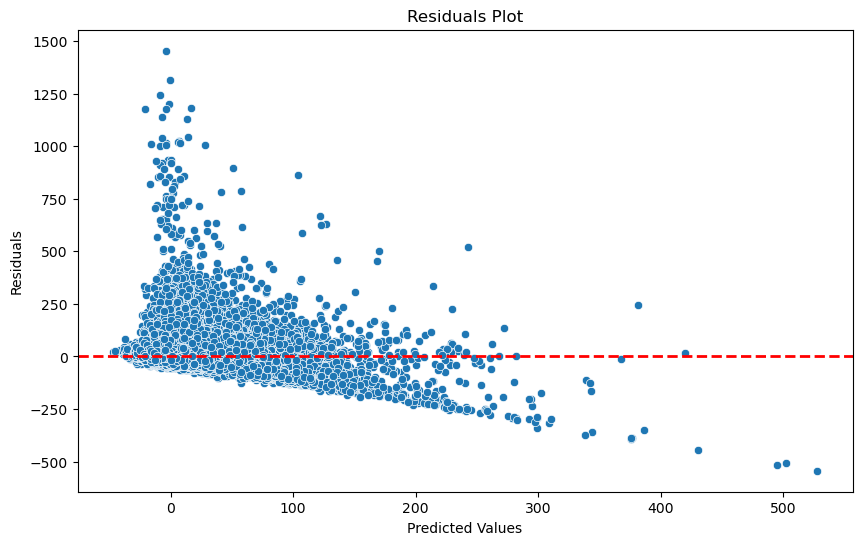

In [214]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# the selected columns
selected_columns = ['DEP_TIME', 'OP_CARRIER', 'ORIGIN', 'DEST', 'ARR_DELAY']#['DEP_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'TAXI_OUT', 'ARR_DELAY']
data = combined_data[selected_columns]

# Convert DEP_TIME to a numeric format
#data['DEP_TIME'] = data['DEP_TIME'].str.replace(':', '').astype(int)

# Drop rows with missing values
data = data.dropna()

# One-hot encode the OP_CARRIER column
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['OP_CARRIER'])
], remainder='passthrough')

# Define features (X) and target variable (y)
X = data.drop('ARR_DELAY', axis=1)
y = data['ARR_DELAY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestRegressor()

# Perform cross-validation to assess performance
y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=5)

# Evaluate the model on the test set
rf_model.fit(X_train, y_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate performance metrics
mae_cv = mean_absolute_error(y_train, y_pred_cv)
mse_cv = mean_squared_error(y_train, y_pred_cv)
r2_cv = r2_score(y_train, y_pred_cv)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Assess feature importance
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_

# Display results
print(f'Cross-Validated MAE: {mae_cv:.4f}')
print(f'Cross-Validated MSE: {mse_cv:.4f}')
print(f'Cross-Validated R-squared: {r2_cv:.4f}\n')

print(f'Test Set MAE: {mae_test:.4f}')
print(f'Test Set MSE: {mse_test:.4f}')
print(f'Test Set R-squared: {r2_test:.4f}\n')

# Feature importance plot
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.title('Feature Importance')
plt.show()

# Residual plot
residuals = y_train - y_pred_cv
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_cv, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# the selected columns
selected_columns = ['DEP_TIME', 'OP_CARRIER', 'ARR_DELAY']#['DEP_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'TAXI_OUT', 'ARR_DELAY']
data = combined_data[selected_columns]

# Drop rows with missing values
data = data.dropna()

# Define features (X) and target variable (y)
X = data.drop('ARR_DELAY', axis=1)
y = data['ARR_DELAY']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor model with default parameters
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Absolute Error: 22.7292
Mean Squared Error: 1715.5579
R-squared: 0.0550


In [216]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features and target
selected_columns = ['DEP_TIME', 'OP_CARRIER', 'ARR_DELAY']#['DEP_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'TAXI_OUT', 'ARR_DELAY']
data = combined_data[selected_columns]

# Handle missing values
data = data.dropna()

# Define features and target variable
X = data.drop('ARR_DELAY', axis=1)
y = data['ARR_DELAY']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')



Mean Absolute Error: 22.7779
Mean Squared Error: 1720.5694
R-squared: 0.0522


In [221]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime

# Load real-time dataset
real_time_data = pd.read_csv('item_exported 2.csv')
real_time_data.head()


,response/airline_iata,response/arr_estimated_utc,response/arr_iata,response/dep_estimated_utc,response/dep_iata
0,DL,2023-11-25 07:20:00,CPT,2023-11-24 16:50:00,ATL
1,AF,2023-11-25 01:32:00,MEX,2023-11-24 21:30:00,ATL
2,AM,2023-11-25 01:32:00,MEX,2023-11-24 21:30:00,ATL
3,DL,2023-11-25 01:32:00,MEX,2023-11-24 21:30:00,ATL
4,KE,2023-11-25 01:32:00,MEX,2023-11-24 21:30:00,ATL


In [222]:
# Rename columns
#real_time_data.rename(columns={'response/dep_estimated_utc': 'DEP_TIME', 'response/airline_iata': 'OP_CARRIER'}, inplace=True)
real_time_data.rename(columns={
    'response/airline_iata': 'OP_CARRIER', 
    'response/arr_estimated_utc': 'ARR_ESTIMATED_TIME', 
    'response/arr_iata': 'ORIGIN', 
    'response/dep_estimated_utc': 'DEP_TIME', 
    'response/dep_iata': 'DEST'
}, inplace=True)

real_time_data['DEP_TIME'].fillna(0, inplace=True)

# Extract hours and minutes directly from the string and concatenate them
real_time_data['DEP_TIME'] = real_time_data['DEP_TIME'].str[11:13] + real_time_data['DEP_TIME'].str[14:16]

real_time_data['DEP_TIME'].fillna('0000', inplace=True)


# Replace empty strings with a placeholder (e.g., '0000') and then convert to integer
real_time_data['DEP_TIME'] = real_time_data['DEP_TIME'].astype(int)


# Display the first few rows of the dataframe to verify the changes
real_time_data.head()

,OP_CARRIER,ARR_ESTIMATED_TIME,ORIGIN,DEP_TIME,DEST
0,DL,2023-11-25 07:20:00,CPT,1650,ATL
1,AF,2023-11-25 01:32:00,MEX,2130,ATL
2,AM,2023-11-25 01:32:00,MEX,2130,ATL
3,DL,2023-11-25 01:32:00,MEX,2130,ATL
4,KE,2023-11-25 01:32:00,MEX,2130,ATL


In [224]:
from sklearn.preprocessing import LabelEncoder

# Assuming real_time_data is our DataFrame and it contains categorical columns
categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']  

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    # The encoder requires that there are no missing values in the column
    real_time_data[col] = real_time_data[col].fillna('')  # Fill missing values with empty string or another placeholder
    real_time_data[col] = label_encoder.fit_transform(real_time_data[col])

# Display the first few rows to verify the changes
#print(real_time_data['OP_CARRIER'])

#real_time_data.head()


# Make sure to select the same features as used in model
features = ['DEP_TIME', 'OP_CARRIER', 'ORIGIN', 'DEST']  # Add other feature columns used in your model
real_time_features = real_time_data[features]


# Predict with the model
predictions = rf_model.predict(real_time_features)

# Add predictions to your dataframe (optional)
real_time_data['Predicted_ARR_DELAY'] = predictions

# Display predictions
print(real_time_data[['DEP_TIME', 'OP_CARRIER', 'ORIGIN', 'DEST','Predicted_ARR_DELAY']])


      DEP_TIME  OP_CARRIER  ORIGIN  DEST  Predicted_ARR_DELAY
0         1650          35      57     0                -4.86
1         2130          14     144     0                14.97
2         2130          15     144     0                19.06
3         2130          35     144     0                 9.45
4         2130          52     144     0                 9.45
...        ...         ...     ...   ...                  ...
3095         0          35     125    12               131.19
3096         0          47     125    12               131.19
3097         0          49     125    12               131.19
3098         0          52     125    12               131.19
3099         0          79     125    12               131.19

[3100 rows x 5 columns]


In [233]:
# Add the predictions as a new column to the DataFrame
real_time_data['Predicted_ARR_DELAY'] = predictions

# Now write the DataFrame including the new column back to CSV
# This will retain all the original data and include the new column
real_time_data.to_csv('new_file.csv', index=False)